In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import numpy as np
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

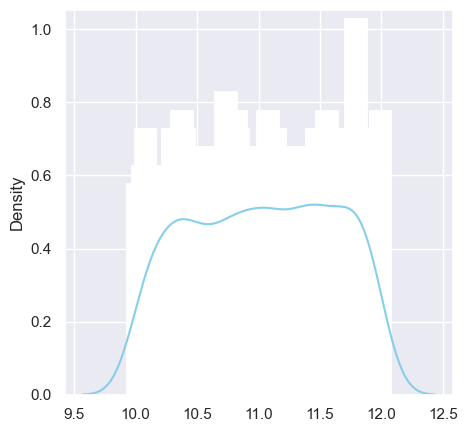

In [43]:
uniform_data = scipy.stats.uniform.rvs(loc=10, scale=2,size=1000)
ax = sns.distplot(uniform_data,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

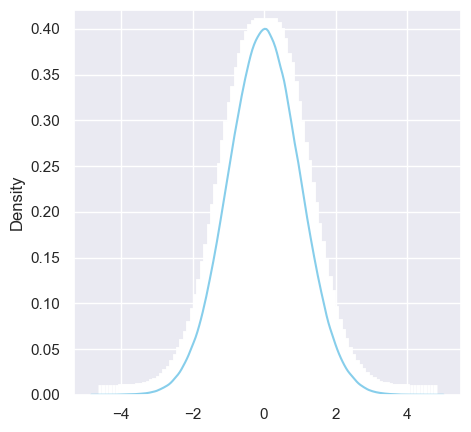

In [44]:
standard_normal_data = scipy.stats.norm.rvs(loc=0, scale=1,size=1000000)
ax = sns.distplot(standard_normal_data,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

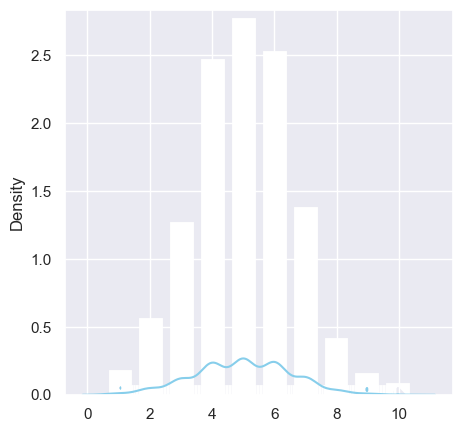

In [45]:
binom_data = scipy.stats.binom.rvs(n=10, p=0.5,size=1000)
ax = sns.distplot(binom_data,
                bins=100,
                kde=True,
                color='skyblue',
                hist_kws={"linewidth":15, 'alpha':1})

# Inferential Statistics

In [46]:
data_normal = scipy.stats.norm.rvs(loc=0, scale=1, size=200)

In [47]:
means_of_means = []
for experiment in range(1000):
   resampled = np.random.choice(data_normal,size= len(data_normal), replace=True)
   means_of_means.append(np.mean(resampled))

In [48]:
len(means_of_means)

1000

In [49]:
np.mean(means_of_means)

0.030297653348230293

In [50]:
lower_bound = np.quantile(means_of_means, 0.025)
upper_bound = np.quantile(means_of_means, 0.975)

In [51]:
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (-0.10942758507782854, 0.16318881606971652)


In [52]:
np.std(means_of_means)

0.06983503571431691

In [53]:
lower_bound = np.mean(means_of_means) - np.std(means_of_means)*1.96
upper_bound = np.mean(means_of_means) + np.std(means_of_means)*1.96
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (-0.10657901665183087, 0.16717432334829144)


# Using Formula

In [54]:
def standard_error_of_mean(data):
    s = np.std(data)
    nobs = len(data)
    return s/(nobs**0.5)

In [55]:
se = standard_error_of_mean(data_normal)
m = np.mean(data_normal)

In [56]:
lower_bound = m - se*1.96
upper_bound = m + se*1.96
print("95% CI of Population Mean: ({}, {})".format(lower_bound, upper_bound))

95% CI of Population Mean: (-0.10928346563919297, 0.1724465828490012)


## Proprotion

In [57]:
import pandas as pd
data = pd.read_csv("heart.csv")

In [58]:
data["Sex_Category"] = data.sex.replace({1:"Male", 0:"Female"})

In [59]:
df = data[["Sex_Category", "target"]].dropna()

In [60]:
pd.crosstab(df.target, df.Sex_Category)

Sex_Category,Female,Male
target,,
0,86,413
1,226,300


In [61]:
p_fm = 226/(226+86)
n_fm = 86+226

In [62]:
p_fm

0.7243589743589743

In [63]:
se_fm = (p_fm*(1-p_fm)/n_fm)**0.5

In [64]:
se_fm

0.02529714756803247

In [65]:
lb = p_fm - 1.96*se_fm
up = p_fm + 1.96*se_fm
print("95% CI of Population Proportion: ({}, {})".format(lb, up))

95% CI of Population Proportion: (0.6747765651256307, 0.773941383592318)


In [66]:
data_normal


scipy.stats.norm.interval(alpha=0.95,
                          loc=np.mean(data_normal),
                          scale=scipy.stats.sem(data_normal))

(-0.10963435941281341, 0.17279747662262163)

In [67]:
uniform_data

scipy.stats.norm.interval(alpha=0.95,
                          loc=np.mean(uniform_data),
                          scale=scipy.stats.sem(uniform_data))

(10.99213337916215, 11.063712551587736)

## Hypotesis Testing

In [68]:
import statsmodels.api as sm

In [69]:
n_obs = 1018
pnull = 0.52
pnew = 0.56

In [70]:
p_val = sm.stats.proportions_ztest(pnew*n_obs,nobs=n_obs,value=pnull,alternative='larger')[1]

In [71]:
p_val > 0.05

False

## Difference Means

In [72]:
data = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nhanes_2015_2016.csv")
data.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [73]:
females = data[data["RIAGENDR"] == 2]
males = data[data["RIAGENDR"] == 1]

In [74]:
nf = len(females)
meanf = females["BMXBMI"].mean()
sdf = females["BMXBMI"].std()

print(nf, meanf, sdf)

2976 29.939945652173996 7.75331880954568


In [75]:
nm = len(males)
meanm = males["BMXBMI"].mean()
sdm = males["BMXBMI"].std()

print(nm, meanm, sdm)

2759 28.778072111846985 6.252567616801485


In [76]:
sm.stats.ztest(females["BMXBMI"].dropna(), males["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

In [77]:
p_val= 6.591544431126401e-10

In [78]:
p_val > 0.05

False

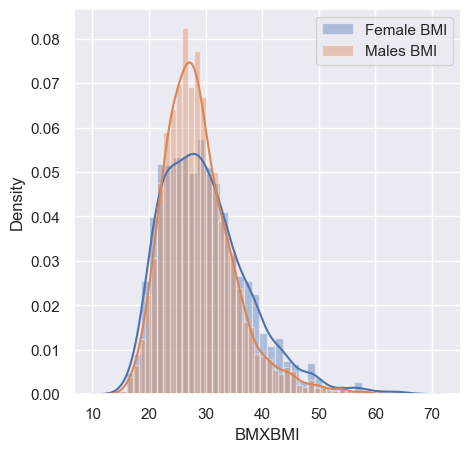

In [79]:
sns.distplot(females["BMXBMI"].dropna(),label="Female BMI")
sns.distplot(males["BMXBMI"].dropna(),label="Males BMI")
plt.legend()

## T-Test

In [80]:
scipy.stats.ttest_ind(a=females["BMXBMI"].dropna(),
                       b=males["BMXBMI"].dropna(),
                       alternative='two-sided')

Ttest_indResult(statistic=6.175593353138321, pvalue=7.050275578094527e-10)

In [81]:
sample1 = scipy.stats.norm.rvs(loc=0.1, scale=1, size=10000)
sample2 = scipy.stats.norm.rvs(loc=0.15, scale=1, size=10000)

p = scipy.stats.ttest_ind(a=sample1,b=sample2, alternative='two-sided').pvalue

if p > 0.05:
    print("Probably From same distribution")
else:
    print("Probably diffrent distribution")

Probably diffrent distribution


## Chi-Square

In [82]:
from scipy.stats import chi2_contingency
data= [[90,120,60],[70,100,60]]

In [83]:
stat, p, dof, expected = chi2_contingency(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=1.125, p=0.570
Probably independent


## Augmented Dickey-Fuller Unit Root Test

In [84]:
from statsmodels.tsa.stattools import adfuller
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.992, p=0.994
Probably not Stationary


## Kwiatkowski-Phillips-Schmidt-Shin

In [85]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably not Stationary')
else:
    print('Probably Stationary')

stat=0.594, p=0.023
Probably Stationary


## Student’s t-test

In [86]:
from scipy.stats import ttest_ind
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.326, p=0.748
Probably the same distribution


## Paired Student’s t-test

In [87]:
from scipy.stats import ttest_rel
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=-0.334, p=0.746
Probably the same distribution


## Analysis of Variance Test (ANOVA)

In [88]:
from scipy.stats import f_oneway
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.096, p=0.908
Probably the same distribution


## Mann-Whitney U Test

In [89]:
from scipy.stats import mannwhitneyu
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=40.000, p=0.473
Probably the same distribution


## Wilcoxon Signed-Rank Test

In [90]:
from scipy.stats import wilcoxon
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=21.000, p=0.557
Probably the same distribution


## Kruskal-Wallis H Test

In [91]:
from scipy.stats import kruskal
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.571, p=0.450
Probably the same distribution


## Friedman Test

In [92]:
from scipy.stats import friedmanchisquare
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.800, p=0.670
Probably the same distribution
